In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import shapely as shy
from shapely.ops import nearest_points
from shapely.geometry import Point, MultiPoint
import fiona
from fiona.crs import from_epsg
from scipy.spatial import cKDTree
import numpy as np
import osmnx as ox

pd.options.display.max_rows = 4
%matplotlib inline
import os
os.environ["PROJ_LIB"] = "C:\ProgramData\Anaconda3\Library\share" #window

In [2]:
#Filepaths
work = r"D:"
laptop = r"C:\Users\jerem"
origin = laptop

In [3]:
fp = r"\Box Sync\Policy Evaluation\working_data\analytical_file_panel_qt.dta"
df = pd.read_stata(origin+fp)

In [4]:
df.head(2)

,intersection_id,quarter,year,quarterly,index,y,x,st1_name,st2_name,st3_name,...,day_personskilled,day_pedestriansinjured,day_pedestrianskilled,day_cyclistinjured,day_cyclistkilled,day_motoristinjured,day_motoristkilled,flag_collision,latenight_flag_collision,day_flag_collision
0,1,1,2013,2013-01-01,0,199793.6093,986336.149,ALLEN STREET,CANAL STREET,,...,0,0,0,0,0,0,0,1.0,0.0,1.0
1,2,1,2013,2013-01-01,1,202206.1619,982769.331,AVENUE OF THE AMERICAS,LAIGHT STREET,CANAL STREET,...,0,0,0,0,0,0,0,0.0,0.0,0.0


In [5]:
df.columns

Index(['intersection_id', 'quarter', 'year', 'quarterly', 'index', 'y', 'x',
       'st1_name', 'st2_name', 'st3_name',
       ...
       'day_personskilled', 'day_pedestriansinjured', 'day_pedestrianskilled',
       'day_cyclistinjured', 'day_cyclistkilled', 'day_motoristinjured',
       'day_motoristkilled', 'flag_collision', 'latenight_flag_collision',
       'day_flag_collision'],
      dtype='object', length=163)

In [6]:
# Put the latitude and longtitude 
df['geometry'] = list(zip(df.x, df.y))
df['geometry'] = df['geometry'].apply(Point)
df1 = gpd.GeoDataFrame(df, geometry='geometry')

In [7]:
df1.head(2)

,intersection_id,quarter,year,quarterly,index,y,x,st1_name,st2_name,st3_name,...,day_pedestriansinjured,day_pedestrianskilled,day_cyclistinjured,day_cyclistkilled,day_motoristinjured,day_motoristkilled,flag_collision,latenight_flag_collision,day_flag_collision,geometry
0,1,1,2013,2013-01-01,0,199793.6093,986336.149,ALLEN STREET,CANAL STREET,,...,0,0,0,0,0,0,1.0,0.0,1.0,POINT (986336.149 199793.609300002)
1,2,1,2013,2013-01-01,1,202206.1619,982769.331,AVENUE OF THE AMERICAS,LAIGHT STREET,CANAL STREET,...,0,0,0,0,0,0,0.0,0.0,0.0,POINT (982769.331 202206.161899999)


In [8]:
#df1.crs = {'init' :'epsg:2263'}
df1.crs = from_epsg(2263)

In [9]:
df1.crs

{'init': 'epsg:2263', 'no_defs': True}

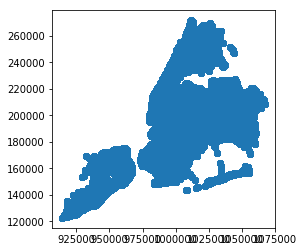

In [10]:
df1.plot()

## Saving the analytical panel dataset as a shapefile
The shapefile is needed to calculate the contiguity matrix in stata

In [11]:
type(df1)

geopandas.geodataframe.GeoDataFrame

In [12]:
df1['geometry'].head()

0          POINT (986336.149 199793.609300002)
1          POINT (982769.331 202206.161899999)
                       ...                    
3    POINT (982812.255500004 201529.961799994)
4    POINT (982816.395600006 201226.109699994)
Name: geometry, Length: 5, dtype: object

In [13]:
 save_out = df1[['collision_count','personsinjured','pedestriansinjured','cyclistinjured','motoristinjured','bronx','brooklyn','manhattan','queens','statenisland','distance_to_LPIS','distance_to_Street','distance_to_Sch','distance_to_LTC','distance_to_bikeroute','distance_to_truckroute','flag_left_turn_ever','flag_left_turn','flag_LPIS_ever','flag_LPIS','bike_route_tv','bike_route_ever', 'flag_seniors','flag_priorityinters','flag_school', 'flag_street_improv','quarter','year','intersection_id','y','x','geometry']]

In [14]:
type(save_out)

geopandas.geodataframe.GeoDataFrame

In [15]:
fp =  r"\Box Sync\Policy Evaluation\working_data\analytical_panel_shapefile\analytical_panel_qt_shapefile.shp"

save_out.to_file(origin+fp)